### Andrew Taylor
### atayl136

# JHU Whiting School EN685.621.82
# Algorithms for Data Science PA 1

This is my notebook to answer the first two questions of the programming assignment. The final question is answered with .py files.

### Question 1 - Data Analysis
a) (10 points) Perform statistics of each feature and class using the test statistics listed in
Table 1. You may use built-in function for your solution. Your results should be in a table
that is easy to follow and reference.

In [52]:
# 1) a)
# import modules and load in dataset
import pandas as pd
import numpy as np
import scipy.stats as stats

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('iris.csv')

In [53]:
import pandas as pd
import scipy.stats as stats

# Set display width option
pd.set_option('display.width', 1000)

# Select numeric columns for calculations
numeric_cols = df.select_dtypes(include=[float, int])

# Calculate statistics for each feature
feature_stats = numeric_cols.describe()

# Calculate skewness for each feature
skewness = numeric_cols.skew()

# Calculate kurtosis for each feature
kurtosis = numeric_cols.kurtosis()

# Group the DataFrame by species and calculate statistics for each group
grouped_stats = df.groupby('species').describe()

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Print table of statistics for each feature
print("Basic Statistics by Feature:")
print(feature_stats)

# Select numeric columns for calculations
numeric_cols = df.select_dtypes(include=[float, int])

# Calculate trimmed mean for each feature
alpha_trimmed_mean = numeric_cols.apply(lambda x: stats.trim_mean(x, proportiontocut=0.15))

# Create a new DataFrame for trimmed means
trimmed_means = pd.DataFrame()

# Iterate over each column in the original DataFrame
for column in df.columns:
    # Exclude non-numeric columns
    if df[column].dtype in [float, int]:
        # Sort the column in ascending order
        sorted_column = df[column].sort_values()
        # Remove the largest three and smallest three values
        trimmed_column = sorted_column[3:-3]
        # Calculate the mean of the trimmed column
        trimmed_mean = trimmed_column.mean()
        # Add the trimmed mean to the trimmed_means DataFrame
        trimmed_means[column] = [trimmed_mean]

# Print the trimmed means DataFrame
print('\n')
print("Trimmed Means by Feature - 3 values dropped from each side:")
print(trimmed_means)


# Print alpha trimmed mean for each feature
print("\n")
print("Alpha Trimmed Mean of 15% by Feature:")
print(alpha_trimmed_mean)

# Print skewness for each feature
print("\nSkewness by Feature:")
print(skewness)

# Print kurtosis for each feature
print("\nKurtosis by Feature:")
print(kurtosis)

# Print table of statistics grouped by species sequentially
print("\nBasic Statistics Grouped by Species:")
species_list = df['species'].unique()
for species in species_list:
    print("\nSpecies:", species)
    species_data = grouped_stats.loc[species]
    print(species_data)


# Create a new DataFrame for trimmed means grouped by species
trimmed_means_grouped = pd.DataFrame()

# Group the DataFrame by species
grouped_species = df.groupby('species')

# Iterate over each species in the grouped DataFrame
for species, species_data in grouped_species:
    # Create a new DataFrame for the current species
    trimmed_means_species = pd.DataFrame()
    
    # Iterate over each column in the species_data DataFrame
    for column in species_data.columns:
        # Exclude non-numeric columns
        if species_data[column].dtype in [float, int]:
            # Sort the column in ascending order
            sorted_column = species_data[column].sort_values()
            # Remove the largest three and smallest three values
            trimmed_column = sorted_column[3:-3]
            # Calculate the mean of the trimmed column
            trimmed_mean = trimmed_column.mean()
            # Add the trimmed mean to the trimmed_means_species DataFrame
            trimmed_means_species[column] = [trimmed_mean]
    
    # Add the trimmed_means_species DataFrame to the trimmed_means_grouped DataFrame, with species as index
    trimmed_means_grouped = pd.concat([trimmed_means_grouped, trimmed_means_species.rename(index={0: species})])

# Print the trimmed means grouped by species DataFrame
print("\nTrimmed Means Grouped by Species, 3 most extreme values each side dropped:")
print(trimmed_means_grouped)

# Create a new DataFrame for trimmed means grouped by species
trimmed_means_grouped = pd.DataFrame()

# Group the DataFrame by species
grouped_species = df.groupby('species')

# Iterate over each species in the grouped DataFrame
for species, species_data in grouped_species:
    # Select numeric columns for calculations within the species
    numeric_cols = species_data.select_dtypes(include=[float, int])
    
    # Calculate trimmed mean for each feature within the species
    trimmed_mean_species = numeric_cols.apply(lambda x: stats.trim_mean(x, proportiontocut=0.15))
    
    # Add the trimmed mean to the trimmed_means_grouped DataFrame
    trimmed_means_grouped = pd.concat([trimmed_means_grouped, trimmed_mean_species.rename(species)], axis=1)

# Print the trimmed means grouped by species DataFrame
print("\nAlpha Trimmed Means of 15%, Grouped by Species:")
print(trimmed_means_grouped)

  
# Create a new DataFrame for each species with features as rows and skewness/kurtosis as columns
for species, species_data in grouped_species:
    species_numeric_cols = species_data.select_dtypes(include=[float, int])
    species_skewness = species_numeric_cols.skew()
    species_kurtosis = species_numeric_cols.kurtosis()
    
    species_df = pd.DataFrame({'Skewness': species_skewness, 'Kurtosis': species_kurtosis})
    
    print("\nSpecies:", species)
    print(species_df)

Basic Statistics by Feature:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Trimmed Means by Feature - 3 values dropped from each side:
   sepal_length  sepal_width  petal_length  petal_width
0      5.834028     3.048611      3.751389     1.194444


Alpha Trimmed Mean of 15% by Feature:
sepal_length    5.803774
sepal_width     3.038679
petal_length    3.790566
petal_width     1.186792
dtype: float64

Skewness by Feature:
sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal

b) (10 points) Perform analysis and provide an explanation of what each of the statistics provides
of the data. The analysis should reference your table from Part (a). What conclusions
can you make based on these statistics?

Starting with the first table, we have descriptive statistics of the dataset grouped by feature. The statistics reported are, in order, the observation count, the mean, the standard deviation, the minimum, values representing the interquartile range, and the maximum. The subsequent two tables report the skewness and kurtosis by feature. Then, the previously mentioned statistics for each feature are reported by class, with a seperate table for each feature. It was printed vertically and seperately to handle display space properly. After the descriptive statistics by class for each feature is a few small tables showing the skewness and kurtosis for each class' features. These were printed seperately for simplicity, because they are not included with the built-in function. 

First, I will explain each statistic in a list. 

Minimum - the smallest value in a series  
Maximum - the largest value in a series  
Mean - the expected value for the series  
Trimmed Mean - a mean taken after removing extreme values. Here, 3 consecutive values from each extreme were removed.  
Alpha Trimmed Mean - this is a trimmed mean specified by a percentage of the distribution to removed at each extreme.  
Standard Deviation - A measure of "spread" this is the square root of the variance, to put it simply.  
Skewness - I like to think of skewness as a measure of central tendancy, positive skewness values indicate a distribution more spread out above the mean, while negative values of skewness indicate the opposite.  
Kurtosis - Kurtosis is a me3asure of "peakedness" of the distribution, or alternatively the fatness of the tails. Negative values indicate fat tails, while positive values indicate higher peaks and smaller tails.  

Many different conclusions about these three species of Irises can be drawn from just this preliminary reporting of the statistics of the dataset. I will proceed from the first tables downward, so analysis by feature then by species.

The first table of basic statistics give us a sense of the size of the flowers in centimeters. The minimums and maximums show us the range of the observation sets, and the standard deviation shows us the dispersion of each feature. Sepal width and petal width are the tightest distributions of the features, which makes sense because visually the flowers are long and skinny in their parts. Looking at the interquartile range in comparison to the min and max reveals the presence of outliers.

To get a better sense of the true size of each flower part we take the data with some of these outliers trimmed. The first table shows the mean of each feature with three data points trimmed from each side of the distribution, and similarly the alpha trimmed mean trims 15% of the observations from each side. Looking at these numbers we get a better look at the most representative mean for each feature: in comparison with the previous means the means have shrunk when the trimmed mean was taken, but in the case of the alpha trimmed mean the mean of the petal length actually got larger, indicating a greater presence of small value outliers in that feature. (Figure 1)




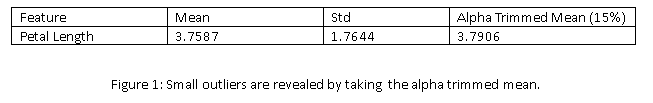

This is confirmed by looking at the skewness statistics reported just below that. The sepal measurements display some positive skewness, while the petal sizes skew negative. Here we can already begin to make certain inferences about the irises found in this area. What would cause the petals to skew opposite to the sepals? This interesting characteristic would have to be studied further to find out if the cause is genetic or environmental. (Figure 2)

The kurtosis statistics by feature also give us a broad view of irises in general. Kurtosis is substantially negative in all cases except sepal width, where observations across the dataset are closer to normally distributed. The broad, flat distributions for the other features show us there is a substantial variation from flower to flower in the dataset; large tails indicate that mother nature creates diversity in this case.


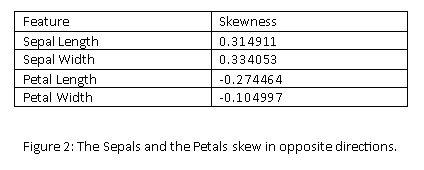

Looking by species, we can see there is considerable overlap in the features in most cases. One place where distinguishing features exist is petal length. From a cursory look at the mean and standard deviation we can find groupings that tend to seperate. (Figure 3) Otherwise it would seem that the flower species have more overlap in their measures. The trimmed mean and alpha trimmed mean for the species confirm this, and also hint that pedal width could be a good distinguishing feature. The skewness and kurtosis by species also provides valuable information. If I was asked to classify an example flower using only this data, I could look for features where the skewness numbers have the greatest disparity and the kurtosis is the most negative. This would clue me to features that overlap the least and provide the most distinction between observations.

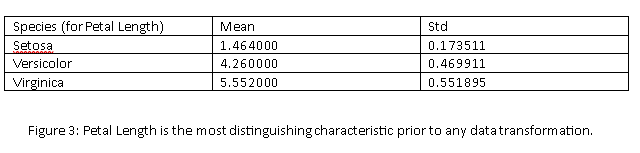

### Question 2 - Data Processing

a) Implement an algorithm to visually see two sets of features and the class they
belong to. The use of seaborn: statistical data visualization (https://seaborn.pydata.org/)
is a good choice.

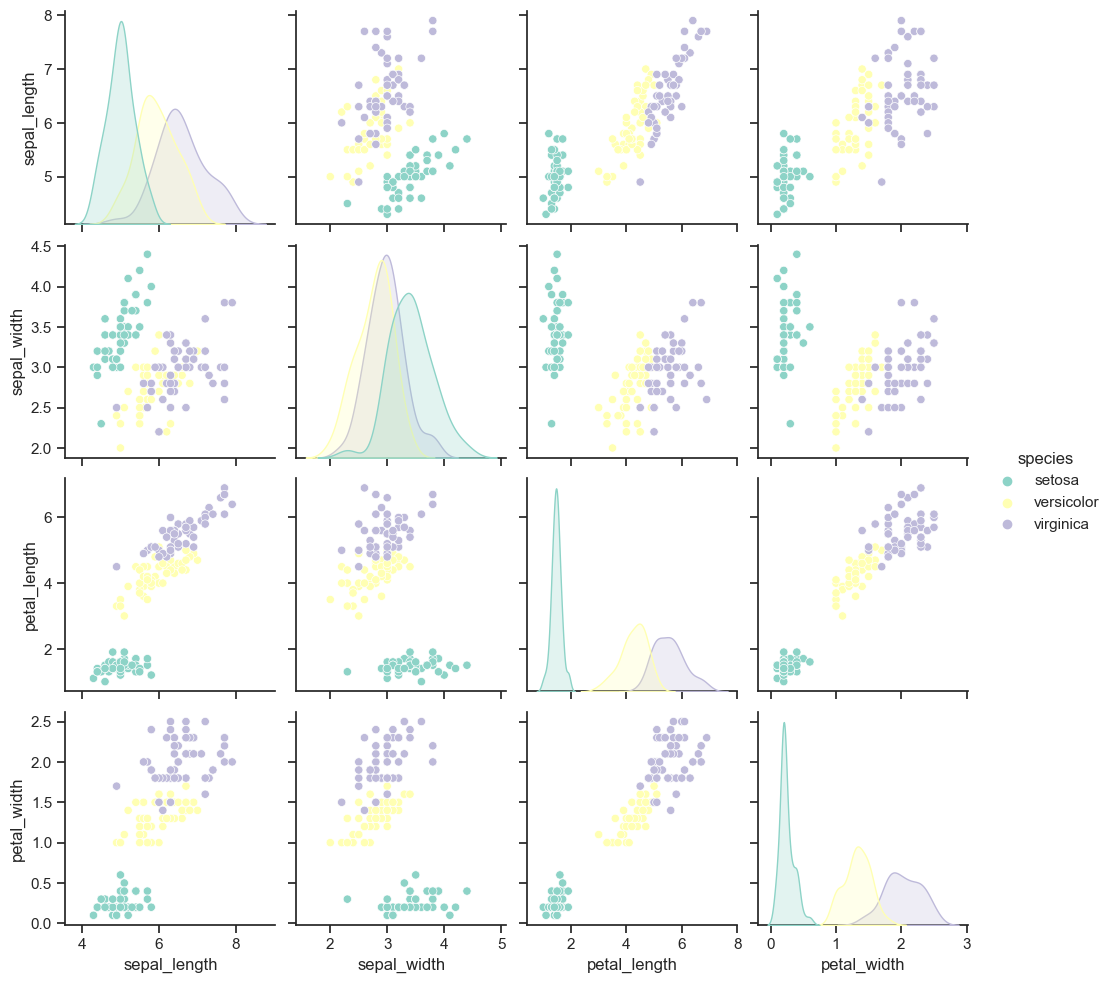

In [69]:
# a)
import seaborn as sns

# Set the style of the plot
sns.set(style="ticks")

# Create the pairs plot
sns.pairplot(data=df, hue="species", palette="Set3")

# Display the plot
plt.show()


b) Sorting [10 points]
i. Develop an algorithm (pseudocode) to sort the four features in the dataset.  
ii. Provide the running time and total running time of your algorithm in O-notation and
T(n).  
iii. Implement your algorithm in Python, recommend a class to use in later assignments.  
The use of a built in function or the use of the Python code provided.  
iv. Determine if any of the four features can separate the three plant species.  
v. Provide an explanation of the results:  
A. Was there any feature that could separate the plant species; if so why, if not why
not?  
B. What was the metric used to determine separation? Explain why the metric was
chosen.  

b) i) Here is the pseudocode for a merge sort, it requires an index to keep track of rows:


function merge_sort(value and index pairs):  
  if len(value pairs) > 1:  
        mid = midpoint index of values  
        left half = left half of values and indicies  
        right half = right half of values and indicies  
        
        #### Now a recursive call on each half ####  
        merge_sort(left_half)  
        merge_sort(right_half)  
        
        #### Indicies needed ####  
        i = 0  
        j = 0  
        k = 0  
        
        while i in left half and j in right half:  
            if value is smaller, move to k = (0)  
            increment i  
            else move to right half  
            increment j  
        
        #### merge ####  
        
        while i is in the left half  
        move value to k  
        increment i  
        increment k  
        
        while j is in the right half  
        move value to k  
        increment j  
        increment k  
        
    return sorted_list  

b) ii) Merge Sort is a recursive algorithm and time complexity can be expressed as following recurrence relation. T(n) = 2T(n/2) + O(n) The solution of the above recurrence is O(nLogn)

In [78]:
# b) iii)
import pandas as pd

class DataFrameSorter:
    def __init__(self, df, column_name):
        self.df = df
        self.column_name = column_name

    def merge_sort_pairs(self, pairs):
        if len(pairs) > 1:
            mid = len(pairs) // 2
            left_half = pairs[:mid]
            right_half = pairs[mid:]

            self.merge_sort_pairs(left_half)
            self.merge_sort_pairs(right_half)

            i = 0
            j = 0
            k = 0
            while i < len(left_half) and j < len(right_half):
                if left_half[i][1] < right_half[j][1]:
                    pairs[k] = left_half[i]
                    i = i + 1
                else:
                    pairs[k] = right_half[j]
                    j = j + 1
                k = k + 1

            while i < len(left_half):
                pairs[k] = left_half[i]
                i = i + 1
                k = k + 1

            while j < len(right_half):
                pairs[k] = right_half[j]
                j = j + 1
                k = k + 1
        return pairs

    def sort_dataframe(self):
        # create pairs to sort
        pairs_to_sort = list(self.df[self.column_name].reset_index().itertuples(index=False, name=None))

        # perform merge sort on the pairs
        sorted_pairs = self.merge_sort_pairs(pairs_to_sort)

        # create a new sorted index
        new_index = [pair[0] for pair in sorted_pairs]

        # reorder the dataframe
        self.df = self.df.reindex(new_index)

        return self.df

# assuming df['petal_length'] is the column to be sorted
df_sorter = DataFrameSorter(df, 'petal_length')
print(df)  # original data
print('\n')
df = df_sorter.sort_dataframe()
print(df)  # data sorted on petal length

# other columns can be sorted this way, omitted for brevity

     sepal_length  sepal_width  petal_length  petal_width     species
0             5.1          3.5           1.4          0.2      setosa
1             4.9          3.0           1.4          0.2      setosa
2             4.7          3.2           1.3          0.2      setosa
3             4.6          3.1           1.5          0.2      setosa
4             5.0          3.6           1.4          0.2      setosa
5             5.4          3.9           1.7          0.4      setosa
6             4.6          3.4           1.4          0.3      setosa
7             5.0          3.4           1.5          0.2      setosa
8             4.4          2.9           1.4          0.2      setosa
9             4.9          3.1           1.5          0.1      setosa
10            5.4          3.7           1.5          0.2      setosa
11            4.8          3.4           1.6          0.2      setosa
12            4.8          3.0           1.4          0.1      setosa
13            4.3   

b) iv and v) Strictly speaking, no feature can cleanly divide the species, although petal length comes close. Inspection of the sorted dataset above shows the slight overlap of versicolor and virginica that is visually apparent in the pairs plot. A rotated ellipsis would fare even better. Petal length was chosen because the amount of overlap between the distributions for each species was the smallest. Looking at the petal length overlap at 4.5cm to 5.1cm you could reasonably classify an iris based on petal length outside of this range.

c) [2.5 points] Data Normalization
i. Implement an algorithm to normalize the Iris data by feature. Verify your results by
ensuring each feature has a range from 0 to 1.

In [3]:
# c)
# Load the Iris dataset
df = pd.read_csv('Iris.csv')

# Split the dataset into features and labels
features = df.drop(columns=['species'])
labels = df['species']

# Create an empty DataFrame to store the normalized features
normalized_features = pd.DataFrame()

# Apply min-max scaling to each feature column
for feature in features.columns:
    min_value = features[feature].min()
    max_value = features[feature].max()
    normalized_features[feature] = (features[feature] - min_value) / (max_value - min_value)

# Print the normalized features
print(normalized_features)


     sepal_length  sepal_width  petal_length  petal_width
0        0.222222     0.625000      0.067797     0.041667
1        0.166667     0.416667      0.067797     0.041667
2        0.111111     0.500000      0.050847     0.041667
3        0.083333     0.458333      0.084746     0.041667
4        0.194444     0.666667      0.067797     0.041667
..            ...          ...           ...          ...
145      0.666667     0.416667      0.711864     0.916667
146      0.555556     0.208333      0.677966     0.750000
147      0.611111     0.416667      0.711864     0.791667
148      0.527778     0.583333      0.745763     0.916667
149      0.444444     0.416667      0.694915     0.708333

[150 rows x 4 columns]


d) Outlier Removal [10 points]  
i. Design an algorithm (pseudocode) to remove in sequential order observations that are
furthest from the data class mean by class (species).  
ii. Provide the running time and total running time of your algorithm in O-notation and
T(n). State any assumptions you made in your breakdown.  
iii. Implement your design, recommend creating a class for future use in other assignments.  
iv. Determine if the data contains an outlier by plotting each class individually, the key
is to plot two features at a time n different combinations, e.g., feature 1 vs feature 2,
feature 1 vs feature 3, etc.  
v. Provide an explanation of the results: 
A. Was there any class that had obvious outliers; if so how did you determine the
outlier, if not, why not?  
B. What was the metric used to determine the outlier? Explain why the metric was
chosen.  

d) i) Here is the psuedocode to detect and remove outliers in sequential order based on Wilk's method. It requires a few functions of which Wilk's outlier detection is the main one:

function wilks_multivariate_outlier(dataframe, species_column, alpha):  
  species = species_column in dataframe  
  X = dataframe minus species_column  
  total_samples, features = shape of X   
  outliers = series of zeros with length total_samples  
  
  for each specie in unique species in dataframe:     
    X_specie = rows of X where species equals specie   
    sample_count, feature_count = shape of X_specie   
    mean = mean of X_specie   
    covariance = covariance of transpose of X_specie   
    inv_covariance = inverse of covariance   
    D_squared = series of zeros with length sample_count      
    for i in range from 0 to sample_count:    
      diff = row i of X_specie minus mean   
      D_squared[i] = transpose of diff times inv_covariance times diff    
    critical_value = chi2 function at 1-alpha with features   
    outliers_class = D_squared greater than critical_value   
    outliers at index of X_specie = outliers_class   
  
  return outliers 

function calculate_and_display_means(dataframe):   
  for each specie in unique species in dataframe:   
    print "Mean for specie:"   
    numeric_columns = numeric columns in dataframe   
    print mean of rows where species equals specie in numeric_columns   

function drop_and_display_outliers(dataframe, outlier_dataframe):   
  outlier_indices = indices where outlier is True in outlier_dataframe   
  cleaned_dataframe = dataframe without outlier_indices   
  print "Data Set with Outliers Dropped:"   
  print cleaned_dataframe   


d) ii) 
In this case, we have n = 150 samples, s = 3 species, and p = 4 features. To evaluate each part of the code for its time complexity:

1. Loading the dataset: This is a constant time operation as it doesn't depend on the size of the dataset. Hence, it's O(1).

2. Initializing variables and extracting unique species: This depends on the number of unique species s, so it's O(s). But given s = 3, this is practically constant time as well.

3. The main loop runs for each species s. Inside, you have several operations:

   - Selecting rows corresponding to each species: This operation is O(n), as in the worst case it requires looking at all n rows.
   
   - Computing the mean and covariance matrix: These operations are O(np) and O(np²) respectively. Since p is small and constant, these can be approximated to O(n).
   
   - Inverting the covariance matrix: This is generally an O(p³) operation. But given p = 4, this is practically constant time as well.
   
   - The inner loop for calculating the Mahalanobis distance for each sample of a species runs n/s times on average (assuming each species has roughly the same number of samples). The operations inside are O(p²), but since p is small, this can be approximated to O(1). Hence, the whole inner loop contributes to O(n/s) per species, or O(n) in total.
   
   - Computing the critical value and updating the outliers: These operations are O(n).

4. Creating the DataFrame of outliers and appending species column: This is an O(n) operation as it needs to go through all rows.

So, by combining all these, the overall time complexity is O(sn + n + np + np² + p³ + n/s + n + n) = O(np²), because all other terms are dominated by np².

The total running time T(n) can be calculated as:

T(n) = C1*sn + C2*n + C3*np + C4*np² + C5*p³ + C6*n/s + C7*n + C8*n,

where C1 to C8 are constants depending on your specific computational environment and the efficiency of the software and libraries you are using.

Given s, p are small constants, you can simplify this to:

T(n) = (C1*s + C2 + C3*p + C4*p² + C5*p³/s + C6 + C7 + C8) * n,

which shows that the running time is linear in the number of rows n, with the constant factor depending on the number of species s, the number of features p, and your computational environment.

In [23]:
# d) iii)
import numpy as np
from scipy.stats import f
from scipy.stats import chi2

# Load the Iris dataset
df = pd.read_csv('Iris.csv')

# I prefer to create a function instead of a class I hope this is ok
def wilks_multivariate_outlier(df, species_col, alpha):
    species = df[species_col]
    X = df.drop(columns=species_col)
    n, p = X.shape
    outliers = pd.Series(np.zeros(n, dtype=bool), index=X.index)
    
    for specie in df[species_col].unique():
        X_specie = X[species == specie]
        n, p = X_specie.shape
        mean = np.mean(X_specie, axis=0)
        cov = np.cov(X_specie.T)
        inv_cov = np.linalg.inv(cov)
        D_squared = np.zeros(n)

        for i in range(n):
            diff = X_specie.iloc[i, :] - mean
            D_squared[i] = diff.T @ inv_cov @ diff

        crit_val = chi2.ppf(1-alpha, p)
        outliers_class = D_squared > crit_val
        outliers[X_specie.index] = outliers_class
    
    return outliers

# True indicates an outlier
pd.set_option('display.max_rows', None)
print(outliers_df)

outliers = wilks_multivariate_outlier(df, species_col='species', alpha=0.05)
outliers_df = pd.DataFrame(outliers, columns=['outlier'])
outliers_df['species'] = df['species']

print(outliers_df)

print('\n')
for specie in df['species'].unique():
    print(f"Mean for {specie}:")
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    print(df.loc[df['species'] == specie, numeric_columns].mean())


outlier_indices = outliers_df[outliers_df['outlier'] == True].index
df_clean = df.drop(outlier_indices)

print('\nData Set with Outliers Dropped:\n')
print(df_clean)



     outlier     species
0      False      setosa
1      False      setosa
2      False      setosa
3      False      setosa
4      False      setosa
5      False      setosa
6      False      setosa
7      False      setosa
8      False      setosa
9      False      setosa
10     False      setosa
11     False      setosa
12     False      setosa
13     False      setosa
14      True      setosa
15     False      setosa
16     False      setosa
17     False      setosa
18     False      setosa
19     False      setosa
20     False      setosa
21     False      setosa
22      True      setosa
23     False      setosa
24      True      setosa
25     False      setosa
26     False      setosa
27     False      setosa
28     False      setosa
29     False      setosa
30     False      setosa
31     False      setosa
32     False      setosa
33     False      setosa
34     False      setosa
35     False      setosa
36     False      setosa
37     False      setosa
38     False      setosa


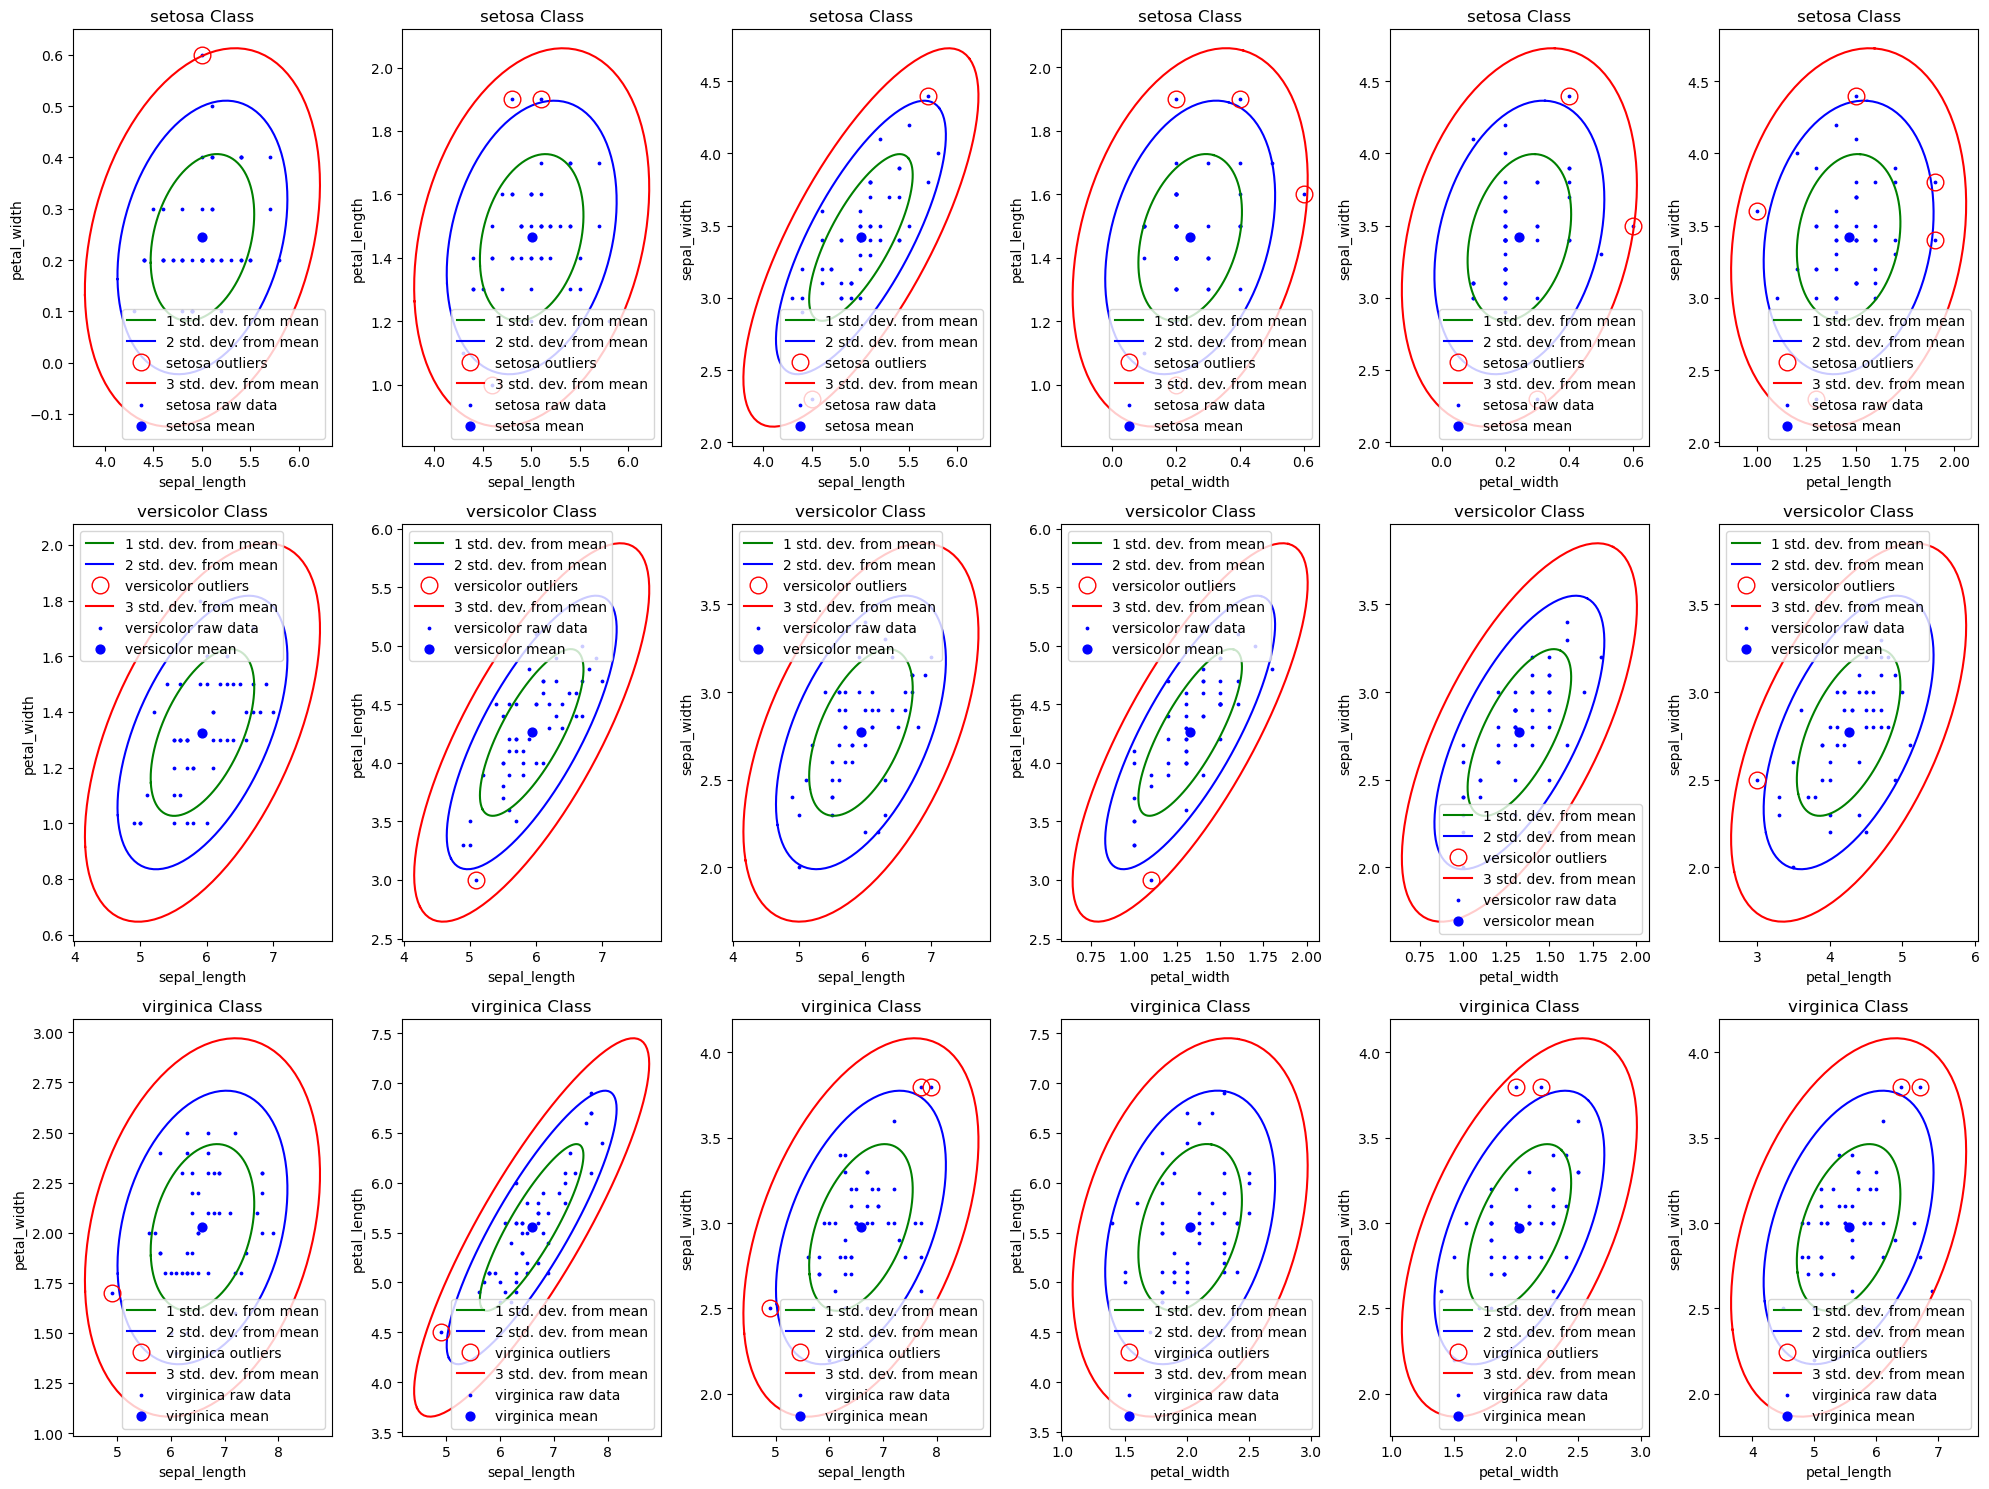

In [54]:
# d) iv)
outlier_indices = outliers_df[outliers_df['outlier'] == True].index

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh
import math
from scipy.stats.distributions import chi2
from scipy import stats
#%matplotlib inline

class sigma_ellipse_plot:

    def __init__(self, df=None, target='setosa', target_header='species', feature1='sepal_length', feature2='petal_width', std_devs=[1, 2, 3]):

        self.data = df
        self.target = target
        self.feature1 = feature1
        self.feature2 = feature2
        self.target_header = target_header
        self.std_devs=std_devs
        self.largest_eigenvalue = None
        self.largest_eigenvector = None
        self.smallest_eigenvalue = None
        self.smallest_eigenvector = None
        self.angle = None
        self.mean = None
        self.r_ellipses = None
        self.mu_X = None
        self.mu_Y = None
        self.chisquare_val = None

    def get_data(self):

        self.data = self.data[self.data[self.target_header] == self.target].drop(self.target_header, axis =1)[[self.feature1, self.feature2]]

        return

    def get_eigens(self):

        covariance_matrix = self.data.cov()
        eigenvalues, eigenvectors = eigh(covariance_matrix)

        self.largest_eigenvector = eigenvectors[np.argmax(eigenvalues)]
        self.largest_eigenvalue = np.max(eigenvalues)
        self.smallest_eigenvector = eigenvectors[np.argmin(eigenvalues)]
        self.smallest_eigenvalue = np.min(eigenvalues)

        return

    def get_angle(self):

        self.angle = math.atan2(self.largest_eigenvector[1], self.largest_eigenvector[0])

        return

    def shift_angle(self):

        if self.angle < 0:
            self.angle = self.angle + 2*math.pi

        return

    def get_mean(self):

        self.mean = self.data.mean()

        return

    def get_chisquare_vals(self):

        self.chisquare_val = []
        for i in range(0, len(self.std_devs)):
            percent_covered = stats.norm.cdf(self.std_devs[i]) - stats.norm.cdf(self.std_devs[i] * -1)
            self.chisquare_val.append((chi2.ppf(percent_covered, df=2))**0.5)

        return self.chisquare_val

    def get_ellipses(self):

        chisquare_val = self.get_chisquare_vals()

        self.r_ellipses = []
        for i in range(0, len(self.std_devs)):
            theta_grid = np.linspace(0,2*math.pi, 100)
            phi = self.angle
            self.mu_X = self.mean[0]
            self.mu_Y = self.mean[1]
            a = chisquare_val[i] * math.sqrt(self.largest_eigenvalue)
            b = chisquare_val[i] * math.sqrt(self.smallest_eigenvalue)

            ellipse_x_r = a * np.cos(theta_grid)
            ellipse_y_r = b * np.sin(theta_grid)

            R = [[math.cos(phi), math.sin(phi)], [-math.sin(phi), math.cos(phi)]]

            ellipses = np.array([ellipse_x_r, ellipse_y_r])

            r_ellipse = ellipses.T.dot(R).T

            self.r_ellipses.append(r_ellipse)

        return
    
    def get_labels(self, special_phrase=None):

        labels = []
        for i in range(0, len(self.std_devs)):

            if special_phrase is None:
                label = str(self.std_devs[i]) + " std. dev. from mean"
                labels.append(label)
            else: 
                label = special_phrase + str(self.std_devs[i]) + " std. dev. from mean"
                labels.append(label)

        return labels

    def pipeline(self):

        self.get_data()
        self.get_eigens()
        self.get_angle()
        self.shift_angle()
        self.get_mean()
        self.get_ellipses()

        return self.data, self.r_ellipses, self.mu_X, self.mu_Y
    
import itertools

if __name__ == '__main__':
    df = pd.read_csv('iris.csv')

    features = ['sepal_length', 'petal_width', 'petal_length', 'sepal_width']
    species = ['setosa', 'versicolor', 'virginica']

    fig, axs = plt.subplots(len(species), len(list(itertools.combinations(features, 2))), figsize=(20, 15))

    for i, sp in enumerate(species):
        for j, (feature1, feature2) in enumerate(itertools.combinations(features, 2)):
            ellipse_obj = sigma_ellipse_plot(df=df, target=sp, feature1=feature1, feature2=feature2)
            data, ellipses, mu_X, mu_Y = ellipse_obj.pipeline()
            plot_labels = ellipse_obj.get_labels()

            colors_for_plot = ['g', 'b', 'r']
            for k in range(len(ellipses)):
                axs[i, j].plot(ellipses[k][0] + mu_X, ellipses[k][1] + mu_Y, colors_for_plot[k], label=plot_labels[k])

                if k == 1:  # Apply the code to the third ellipse only
                    outliers = data[
                        (data[feature1] <= ellipses[k][0].min() + mu_X) |
                        (data[feature1] >= ellipses[k][0].max() + mu_X) |
                        (data[feature2] <= ellipses[k][1].min() + mu_Y) |
                        (data[feature2] >= ellipses[k][1].max() + mu_Y)
                    ]
                    axs[i, j].plot(outliers[feature1], outliers[feature2], marker='o', color='r', linestyle="None", markersize=12, fillstyle='none', label=sp + ' outliers')

            axs[i, j].scatter(data[feature1], data[feature2], c='blue', s=3, label=sp + ' raw data')
            axs[i, j].scatter(mu_X, mu_Y, c='blue', s=40, label=sp + ' mean')

            axs[i, j].set_xlabel(feature1, fontsize=10)
            axs[i, j].set_ylabel(feature2, fontsize=10)
            axs[i, j].set_title(sp + ' Class')
            axs[i, j].legend()

    plt.tight_layout()
    plt.show()



I spent a lot of time trying to get the right points circled, I decided to circle everything outside of the second standard deviation because there were not that many points outside of the red ellipse.

d) v) There were outliers in each class according to the Wilk's method.  
The criteria for determining an outlier was the Mahalanobis distance squared being greater than a critical value which was computed this way: 

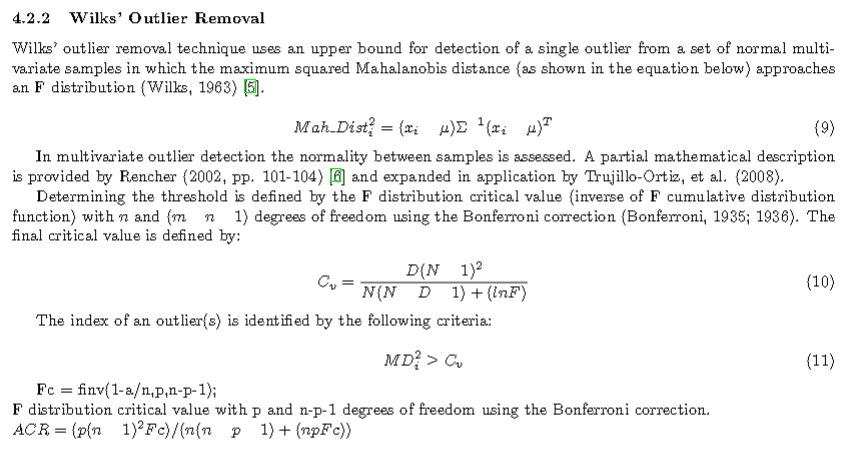

The Wilk's method was chosen because it is preferred for small sample sizes (n is less than or equal to 50).

e) Feature Ranking [10 points]  
i. Design an algorithm (pseudocode) to rank the four features in the Iris dataset.  
ii. Provide the running time and total running time of your algorithm in O-notation and
T(n). State any assumptions you made in your breakdown.  
iii. Implement your design, recommended to create a class for future use.  
iv. Determine if any of the four features can separate the three plant types.  
v. Provide an explanation of the results:  
A. Was there any feature that could separate the data by plant species; if so why, if
not why not?  
B. If a feature could not separate the plant types; what conclusion can drawn from
this feature?  
C. Can a metric be developed to complement the ranking method? Explain why or
why not.  

e) i) Here's the pseudocode for how I plan to rank the features:

function calculate_fisher_ratios(dataframe, species_column, feature_columns):
  species = species_column in dataframe
  fisher_ratios = list of zeros with length of feature_columns

  for feature_index in range from 0 to length of feature_columns:
    feature = feature_columns[feature_index]
    mean_overall = mean of dataframe[feature]
    s_b = 0  // Between-class scatter
    s_w = 0  // Within-class scatter

    for each specie in unique species in dataframe:
      data_specie = rows of dataframe where species equals specie in dataframe[feature]
      mean_specie = mean of data_specie
      s_b += number of data_specie * (mean_specie - mean_overall) ^ 2
      s_w += sum of (data_specie - mean_specie) ^ 2
      
    fisher_ratios[feature_index] = s_b / s_w

  return fisher_ratios

function rank_features_by_fisher_ratio(fisher_ratios, feature_columns):
  feature_ranks = indices of fisher_ratios sorted in descending order
  ranked_features = list of zeros with length of feature_columns

  for rank_index in range from 0 to length of feature_ranks:
    ranked_features[rank_index] = feature_columns[feature_ranks[rank_index]]

  return ranked_features

// Main function to load data, calculate Fisher ratios and rank features
function rank_features_in_iris_dataset():
  dataframe = load dataframe from 'iris.csv'
  species_column = 'species'
  feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

  dataframe[species_column] = encode dataframe[species_column] to integers

  fisher_ratios = calculate_fisher_ratios(dataframe, species_column, feature_columns)

  ranked_features = rank_features_by_fisher_ratio(fisher_ratios, feature_columns)

  print "Features ranked by Fisher's ratio (high to low):"
  for each feature in ranked_features:
    print feature


e) ii) Runtime complexity: The Fisher ratio calculation involves a loop over the unique classes and the features. The Iris dataset has 3 classes and 4 features, so this is essentially constant. However, considering the general case with n samples, c classes, and f features, the worst-case runtime complexity is O(c * f * n) because we iterate through each feature for each class and calculate mean and scatter for n samples.

In terms of time complexity T(n), if we consider n to be the number of samples, f to be the number of features, and c to be the number of classes, then:

T(n) = c * f * O(n) = O(c * f * n)

This implies that the time complexity is linear with respect to the number of samples, but also scales with the number of features and classes. However, for a fixed number of features and classes (such as in the Iris dataset), the time complexity could be considered linear, i.e., O(n).

In [55]:
# e) iii)
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
df = pd.read_csv('iris.csv')

# Encode the class labels to integers
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Calculate Fisher's ratio for each feature
fisher_ratios = []
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in features:
    classes = df['species'].unique()
    mean_overall = df[feature].mean()
    s_b = 0  # Between-class scatter
    s_w = 0  # Within-class scatter
    for cls in classes:
        data_cls = df[df['species'] == cls][feature]
        mean_cls = data_cls.mean()
        s_b += len(data_cls) * (mean_cls - mean_overall) ** 2
        s_w += ((data_cls - mean_cls) ** 2).sum()
    fisher_ratios.append(s_b / s_w)

# Rank the features according to Fisher's ratio
feature_ranks = np.argsort(fisher_ratios)[::-1]
print("Features ranked by Fisher's ratio (high to low):")
for rank in feature_ranks:
    print(features[rank])


Features ranked by Fisher's ratio (high to low):
petal_length
petal_width
sepal_length
sepal_width


e) iv and v)   
I decided to use Fisher's ratio, also known as Fisher's linear discriminant, a method used for finding a linear combination of features that separates or characterizes two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before subsequent classification.

The Fisher ratio is defined as the ratio of the between-class variance to the within-class variance, and it measures how well a feature can separate different classes. Higher Fisher ratios indicate that a feature better separates the classes. Thus, Fisher's ratio is used to rank the features by their discriminative power.

- Between-class variance: This measures how much the means of different classes vary. If the means of different classes for a feature are very different, the feature is good at distinguishing between the classes.
- Within-class variance: This measures how much the values of a feature vary within the same class. If a feature has a low within-class variance, the values of the feature for the same class are similar.

Therefore, a high Fisher's ratio (high between-class variance and low within-class variance) indicates that a feature is good at separating the classes.

In the context of the Iris dataset, the Fisher ratio can be used to identify which of the four features—sepal length, sepal width, petal length, and petal width—best separates the three species of iris flowers: Setosa, Versicolour, and Virginica.

If, for example, the petal length feature has the highest Fisher ratio, this means that the petal lengths for the three species are significantly different (high between-class variance), and the petal lengths within each species are relatively similar (low within-class variance). Therefore, petal length would be the most effective feature at distinguishing between the different species of iris flowers. Conversely, if the sepal width feature has the lowest Fisher ratio, it would be the least effective feature at distinguishing between the species.

A. No single feature perfectly separates the three species. That said, some features are better than others at distinguishing between the species.

For example, the petal width and petal length features are usually better at separating Setosa from Versicolour and Virginica because Setosa typically has smaller petals. However, Versicolour and Virginica overlap more in these feature dimensions and are thus harder to distinguish based on petal width and length alone. Sepal width and sepal length tend not to be as effective for distinguishing between the species.

The reason a single feature might not be able to completely separate the species is due to the natural variability and overlap in these features among different species. Nature doesn't strictly compartmentalize these features for each species - there's a lot of natural variance and overlap.

B. If a feature cannot separate the plant types effectively, it means that feature does not hold much discriminative information for the task of species classification. In other words, the species are similar with respect to this feature, exhibiting a lot of overlap in the feature space. This could suggest that the feature might not be as biologically relevant for distinguishing between these particular species.

C. Yes, additional metrics can be developed to complement the ranking method. Fisher's ratio is just one method of feature ranking, and it primarily captures linear separability of classes based on single features. Other metrics could provide additional insights.

For instance, mutual information could measure the dependency between features and the class label. A high mutual information indicates that knowledge of the feature reduces uncertainty about the class label.

Also, recursive feature elimination, used within the context of a specific machine learning model, could measure the decrease in model performance when a feature is removed. This would capture both the isolated contribution of the feature and its interaction with other features.

Further, some methods can capture non-linear separability. For instance, decision tree-based feature importance can capture non-linear dependencies.

Ultimately, using multiple metrics to evaluate feature importance can give a more robust and complete view of which features are most relevant for a given task. These metrics can be combined or used to create a more comprehensive feature ranking method, if desired. However, the utility of these additional metrics will depend on the specific dataset and task at hand.

f) Principal Component Analysis (PCA) [10 points]  
i. Use the built-in PCA to perform analysis of the Iris data set using all species (classes).  
ii. Use the built-in PCA to perform analysis of the Iris data set by specie (class).  
iii. Provide an explanation of the results:  
A. What is the difference between using all the data and using the data by specie
(class)?  
B. what is the percentage explained for each principal component?  
C. how many principal components should you keep?  

In [57]:
# f) i) and ii)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
df = pd.read_csv('iris.csv')

# Standardize the features 
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)  # Standardize features

# Perform PCA on the entire dataset
pca = PCA()
principalComponents = pca.fit_transform(x)

# Print explained variance ratios for each Principal Component
print('Explained Variance Ratios for all data: ', pca.explained_variance_ratio_)

# Perform PCA on each species (class)
species = df['species'].unique()
for specie in species:
    x_specie = df[df['species'] == specie].loc[:, features].values
    x_specie = StandardScaler().fit_transform(x_specie)
    pca_specie = PCA()
    principalComponents_specie = pca_specie.fit_transform(x_specie)
    print(f'Explained Variance Ratios for {specie}: ', pca_specie.explained_variance_ratio_)


Explained Variance Ratios for all data:  [0.72770452 0.23030523 0.03683832 0.00515193]
Explained Variance Ratios for setosa:  [0.51869524 0.24655851 0.17300759 0.06173866]
Explained Variance Ratios for versicolor:  [0.73158517 0.13656866 0.09874939 0.03309677]
Explained Variance Ratios for virginica:  [0.61368429 0.24117816 0.11306797 0.03206958]


A. The distinction between performing PCA on the entire dataset versus performing it separately by class lies in the context of variance maximization. When PCA is applied to the full dataset, it identifies principal components that account for maximum variability across all data points, irrespective of their labels. This approach is valuable for dimensionality reduction and enables more straightforward visual identification of clusters in the overall data.

In contrast, implementing PCA for each class separately helps to discern the directions that maximize intra-class variance. This method offers insights into the inherent structure and variability within individual classes. However, it might not provide much assistance in differentiating between classes.

B. The explained_variance_ratio_ printed in the Python script is the proportion of dataset variance that each principal component accounts for. If the first principal component's explained variance ratio is, say, 0.72, it means that this component encapsulates 72% of the dataset's variance.

C. The decision regarding how many principal components to retain is typically based on the cumulative explained variance threshold you intend to preserve in your analysis. It's a common practice to retain the least number of principal components that collectively account for a sizable percentage (often 95%) of the total variance.

This is achieved by calculating the cumulative sum of the explained variance ratios from the first component onwards and determining the smallest number of components where the cumulative sum surpasses the chosen threshold.

For instance, in Python:

In [47]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_components = (cumulative_variance <= 0.95).sum() + 1  # Adding 1 as Python is 0-indexed
print('Number of principal components to keep (for 95% cumulative variance): ', num_components)


Number of principal components to keep (for 95% cumulative variance):  2


### Question 3 Comments ###

I recommend you run the tictactoe.py file first (it loads the goal-based agent) so you can have a good experience playing the game. Don't peek at the goal-based strategy, and see how you do against the computer! I think you'll find it fairly difficult. I supplemented my own strategy with notes from a 9-year-old boy so beware! Out of 100 trials it loses to a purely random player 0-2% of the time, winning 81-92% and tying the rest of the time. So don't get frustrated.

The utility player enacts the evaluation formula, which helps to plan moves if there are no winning or blocking moves necessary. In an experiment of 100 trials it loses to a purely random player 3-6% of the time, with wins around 78-90% and ties around 7-18%. My goal-based agent seems a hair better!

In fact, an interesting result occurred when the two were pitted against each other. When the utility agent is player 1, playing against the goal agent resulted in draws 100% of the time over several 100 trial rounds. When my goal-based agent played first, it beat the utility agent 17-26% of the time. Not bad!

Unfortunately, I wasn't able to get the parameterized library to work until Monday night's office hours so I found out too late that I had built my utility agent incorrectly in some way. It is only passing 22 of 30 tests and I can't figure out what I'm doing wrong. I'm sure I could fix it with more time. For example, my method get_utility_of_lines seems to get the right numbers but fails because it passes the line along with the utility score in a tuple. That's just how I built it over the weekend. It hurts me to turn in something imperfect but I tried my best until the tests surprised me. Please See below.

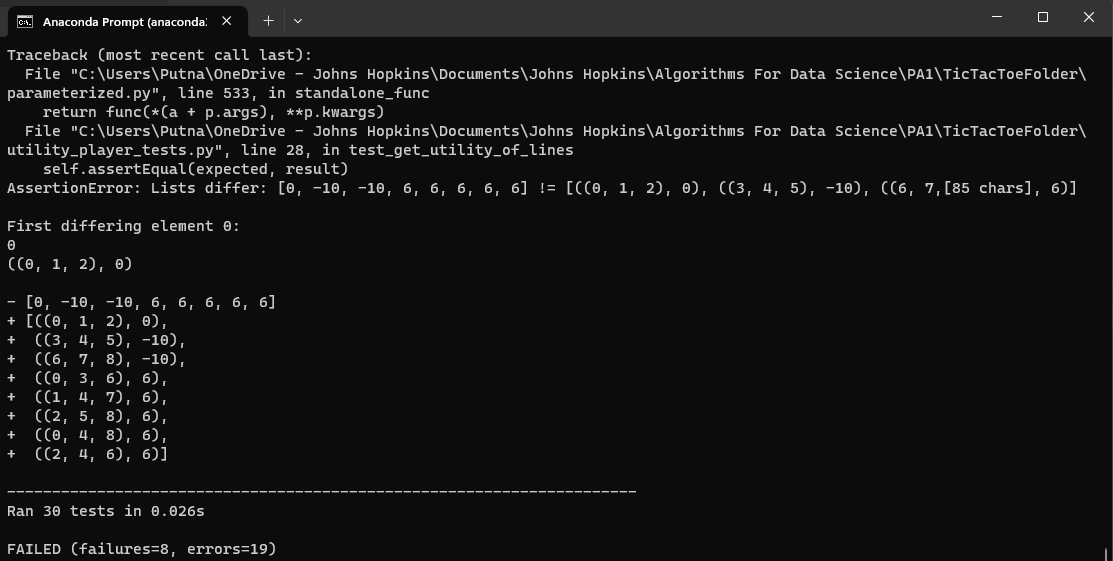

I was also not able to understand from the requirements how the utlity of the line is related to the utility of the space. There doesn't seem to be any guidance on that. My get_utillity_of_spaces chooses an approriate move by iterating over the line with the highest utility and taking the first available move. Perhaps this isn't the utility agent as designed, but it seems to perform well in this variant.

For the goal-based agent,  the _get_winning_move() function has the highest time complexity in this code. It involves a loop over every open space on the board (get_open_spaces()), and for each open space, it copies the board (copy()), marks a space (mark_space()), and checks for a win (has_win()).

Hence, the time complexity of _get_winning_move() function is O(n^2), so is the goal-based agent.

For simplicity, let's represent the cost of individual operations with the following variables:  
c1: cost of assigning a variable  
c2: cost of comparison operation  
c3: cost of calling a method/function  
c4: cost of the copy operation (O(n))  
c5: cost of the mark_space operation (O(1))  
c6: cost of the has_win operation (O(n))  
c7: cost of the get_open_spaces operation (O(n))  

From the above, the total running time T(n) for the _get_winning_move() function is:  

T(n)=c1+c3+c7n+n(c2+c3+c4n+c5+c3+c6n+c1+c5)+c1  

Simplifying, we get:  

T(n)=(2n^2+5n+3)c+n(c2+2c3+2c5+c1)+2c1  

So, the total running time is quadratic with respect to n, which is consistent with the O(n^2) time complexity we determined earlier. The constants c are hardware and language dependent and cannot be determined without running the code.  
As far as the utility-based agent is concerned, the get_next_move function is the main function that determines the next move for the player. This function has three main parts: checking for a winning move, checking for a blocking move, and calculating the utility of each move. It calls the _get_winning_move function twice, which we've already analyzed in the previous discussion.    

The get_utility_of_lines function calculates the utility of each line on the board. The cost of this function is the cost of looping over each line and computing the utility of that line, which includes checking the state of three spaces on the board. The get_line_utility function is called within this function. It's time complexity is O(1) as it performs a fixed number of operations regardless of the input size.    

The get_utility_of_spaces function takes the utilities of the lines and determines the best move. It finds the maximum utility line(s) and then checks if the spaces in those lines are available. If there is more than one line with the maximum utility, it randomly chooses one of them (_break_ties function).    

Assuming n is the size of the board (9 for our 3x3 Tic Tac Toe), the Big O notation of the time complexity of the algorithm is as follows:  

_get_winning_move: O(n2) (as previously discussed)  
get_utility_of_lines: O(n) as it iterates over the lines once.  
get_utility_of_spaces: O(n) as it iterates over the lines and available spaces.  
Therefore, the overall time complexity of the get_next_move function (and thus the entire code) would be O(n2), which is determined by the _get_winning_move function.   

With the costs we assigned earlier, the total running time T(n) for the get_next_move() function is:  
T(n)=(2n^2+5n+3)c+n(c2+2c3+2c5+c1)+2c1+4c1+2c3+8c2+2c5+(n+1)c1+3nc2+nc3+nc8+c1+c3+c4n+c3+c7n+c1+c3+(2n−1)c2+c3+(2n−1)c1+c3+(n−1)c2  

Simplifying, we get:  
T (n)=(2n^2+12n+8)c+n(c2+5c3+2c5+2c1+c4+c7+3c2+c8+(2n−1)c2+(2n−1)c1+(n−1)c2)+8c1+8c2+5c3+2c5  

So, the total running time is quadratic with respect to n, which is consistent with the O(n2) time complexity we determined earlier. The constants c are hardware and language dependent and cannot be determined without running the code.

Perhaps I could have made the algorithms faster without utilitizing the deep copy, but I saw that method provided and wanted to use it. Altering the board directly to check for moves would have required changing the code base, so it wasn't an option anyway. All in all, I'm pretty satisfied with my agents though.

Please see my code to find where I have annotated it with these costs in the comments.


#### This concludes the Jupyter notebook answering Questions 1 & 2. Please refer to my .py files for the work on Question 3. Thank you. ####